In [2]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=b73f62cdd67661a0634e488922ffc6f004799d3921449637742597fcde06e76a
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [4]:
from google.colab import files

# Upload CSV manually
uploaded = files.upload()


Saving heart.csv to heart.csv


In [5]:
df = pd.read_csv('heart.csv')
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
# Check column info
df.info()

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Print unique values to detect categorical data
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
Duplicate rows: 0
Missing values per column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR           

In [7]:
# ✅ Drop Duplicates & Check Missing
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# ✅ Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# ✅ Separate features (X) and target (y)
target_col = 'HeartDisease' if 'HeartDisease' in df.columns else 'target'
X = df.drop(target_col, axis=1)
y = df[target_col]

# ✅ Scale the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# ✅ Print final shape
print(f"Training shape: {X_train.shape}, Testing shape: {X_test.shape}")


Training shape: (734, 15), Testing shape: (184, 15)



📊 Logistic Regression Evaluation
Accuracy: 0.8532608695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



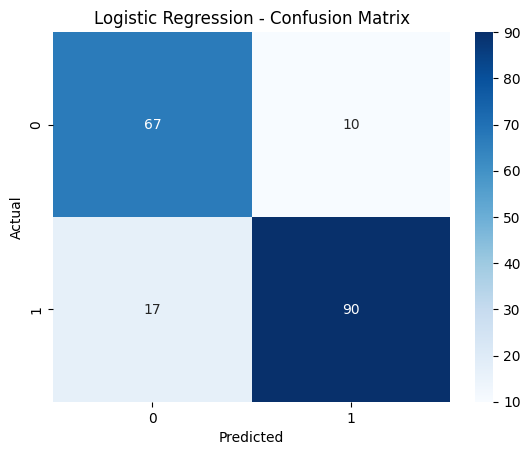


📊 Random Forest Evaluation
Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



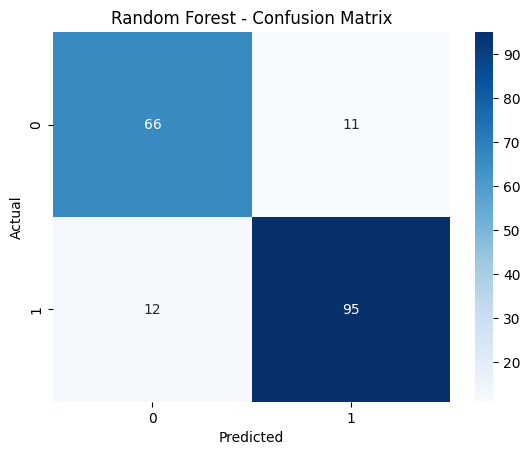

In [8]:
# ✅ Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# ✅ Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ✅ Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ✅ Run evaluations
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


In [9]:
from fpdf import FPDF

# ✅ Collect model scores
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)

# ✅ Build the report
report = FPDF()
report.add_page()
report.set_font("Arial", size=12)

# Title
report.set_font("Arial", 'B', 16)
report.cell(200, 10, txt="Heart Disease Prediction - Model Report", ln=True, align='C')
report.ln(10)

# Section: Dataset
report.set_font("Arial", 'B', 12)
report.cell(200, 10, txt="Dataset Info", ln=True)
report.set_font("Arial", size=12)
report.cell(200, 8, txt=f"Total Samples: {df.shape[0]}", ln=True)
report.cell(200, 8, txt=f"Features Used: {X.shape[1]}", ln=True)
report.ln(5)

# Section: Logistic Regression
report.set_font("Arial", 'B', 12)
report.cell(200, 10, txt="Model: Logistic Regression", ln=True)
report.set_font("Arial", size=12)
report.cell(200, 8, txt=f"Accuracy: {acc_lr:.4f}", ln=True)
report.ln(5)

# Section: Random Forest
report.set_font("Arial", 'B', 12)
report.cell(200, 10, txt="Model: Random Forest Classifier", ln=True)
report.set_font("Arial", size=12)
report.cell(200, 8, txt=f"Accuracy: {acc_rf:.4f}", ln=True)
report.ln(10)

# Final Verdict
better_model = "Random Forest" if acc_rf > acc_lr else "Logistic Regression"
report.set_font("Arial", 'B', 12)
report.cell(200, 10, txt="Final Verdict", ln=True)
report.set_font("Arial", size=12)
report.multi_cell(0, 8, f"The better performing model is: {better_model}. It is recommended for use in heart disease prediction based on the current dataset and evaluation metrics.")

# ✅ Save PDF
report.output("model_report.pdf")
print("✅ PDF report generated as model_report.pdf")


✅ PDF report generated as model_report.pdf


In [10]:
from google.colab import files
files.download("model_report.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load data
df = pd.read_csv('heart.csv')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Split
target = 'HeartDisease' if 'HeartDisease' in df.columns else 'target'
X = df.drop(target, axis=1)
y = df[target]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# Save model and scaler
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and Scaler Saved!")


✅ Model and Scaler Saved!


In [13]:
from google.colab import files
files.download("model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
print(X.columns.tolist())


['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']
